# EDA on E-Commerce Shipping Data

### Data Description
- ID: ID Number of Customers.
- Warehouse block:- The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:-The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls:- The number of calls made from enquiry for enquiry of the shipment.
- Customer rating:- The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product-: Cost of the Product in US Dollars.
- Prior purchases:- The Number of Prior Purchase.
- Product importance:- The company has categorized the product in the various parameter such as low, medium, high.
- Gender:- Male and Female.
- Discount offered:- Discount offered on that specific product.
- Weight in gms:- It is the weight in grams.
- Reached on time:- It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# loading data

df = pd.read_csv('../input/customer-analytics/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.shape # looking at the shape of data

(10999, 12)

In [4]:
df.describe() # getting description of data

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
df.info() # taking a look at info of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


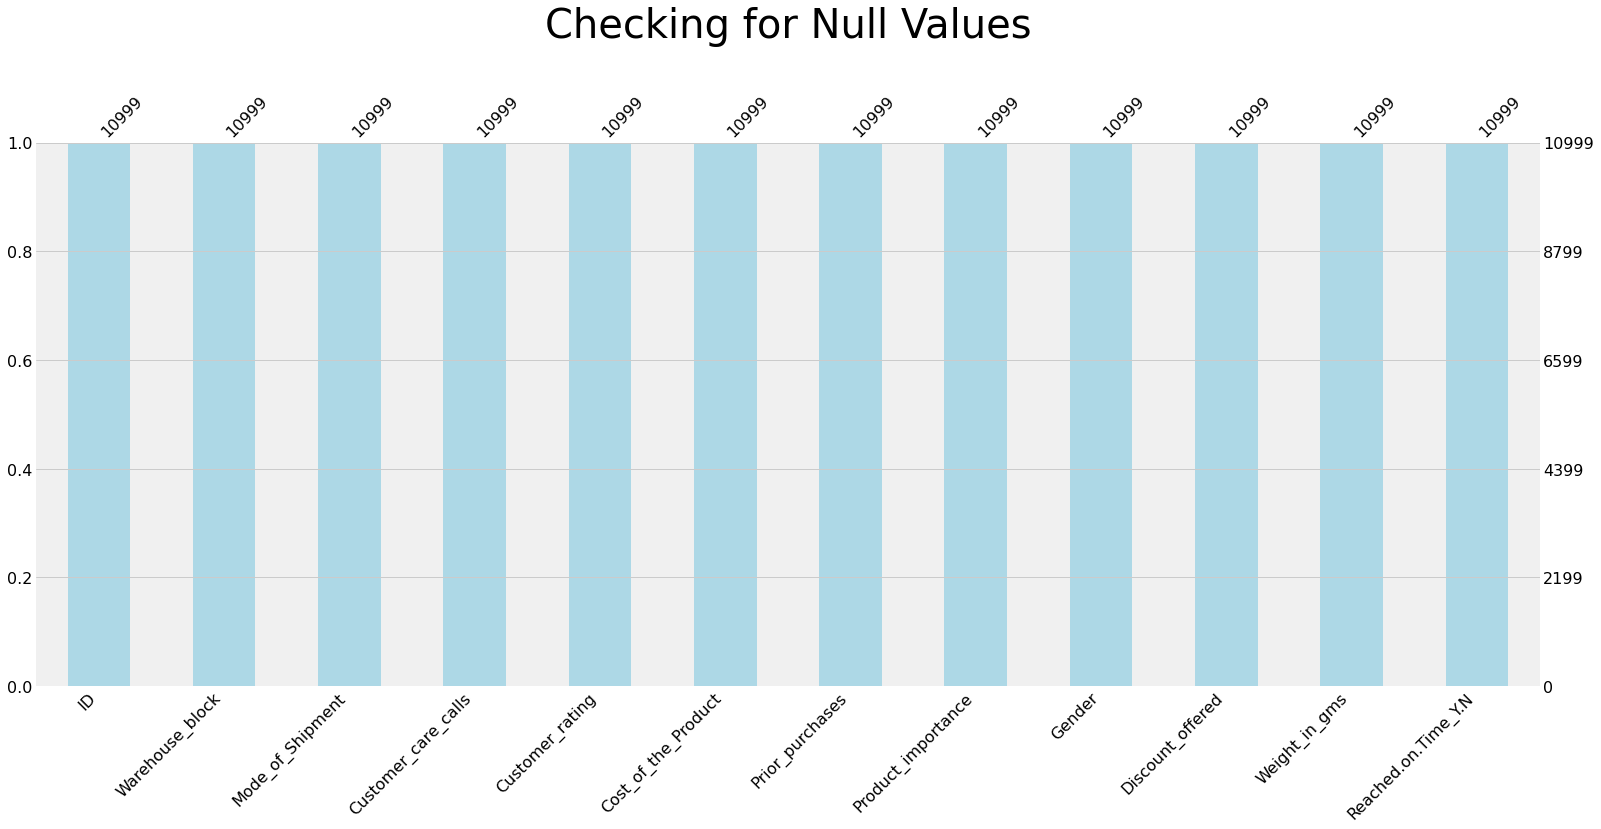

In [6]:
# checking for null values using missingno module

import missingno as msno
msno.bar(df, color = 'lightblue')
plt.title('Checking for Null Values\n', fontsize = 40)
plt.show()

In [7]:
# dropping unwanted column using drop method

df.drop('ID', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


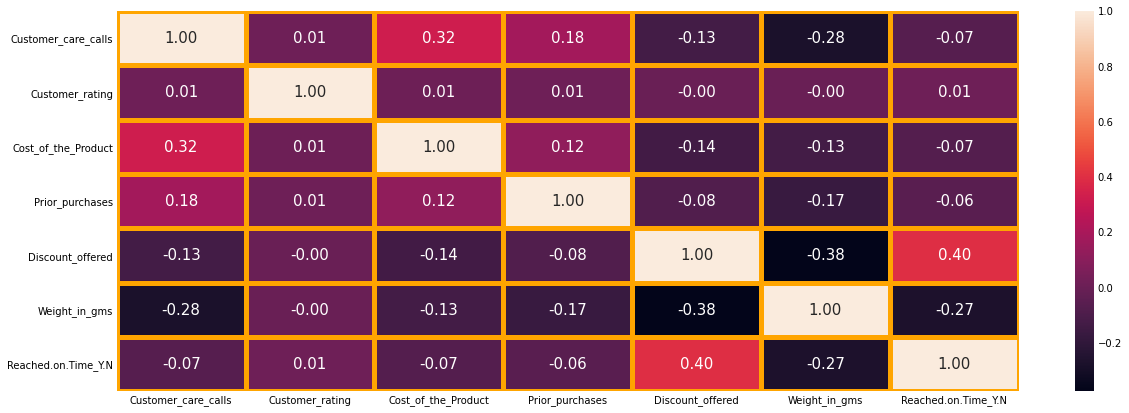

In [8]:
# heatmap of the data for checking the correlation between the features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
plt.show()

Conclusions from Correlation matrix :-
- Discount Offered have high positive correlation with Reached on Time or Not of 40%.
- Weights in gram have negative correlation with Reached on Time or Not -27%.
- Discount Offered and weights in grams have negative correlation -38%.
- Customer care calls and weights in grams havenegative correlation -28%.
- Customer care calls and cost of the product have positive correlation of 32%.
- Prior Purchases and Customer care calls have slightly positive correlation.

In [9]:
df.head() # looking at first five rows of the data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Exploratory Data Analysis (EDA)

**Checking value counts of categorical columns**

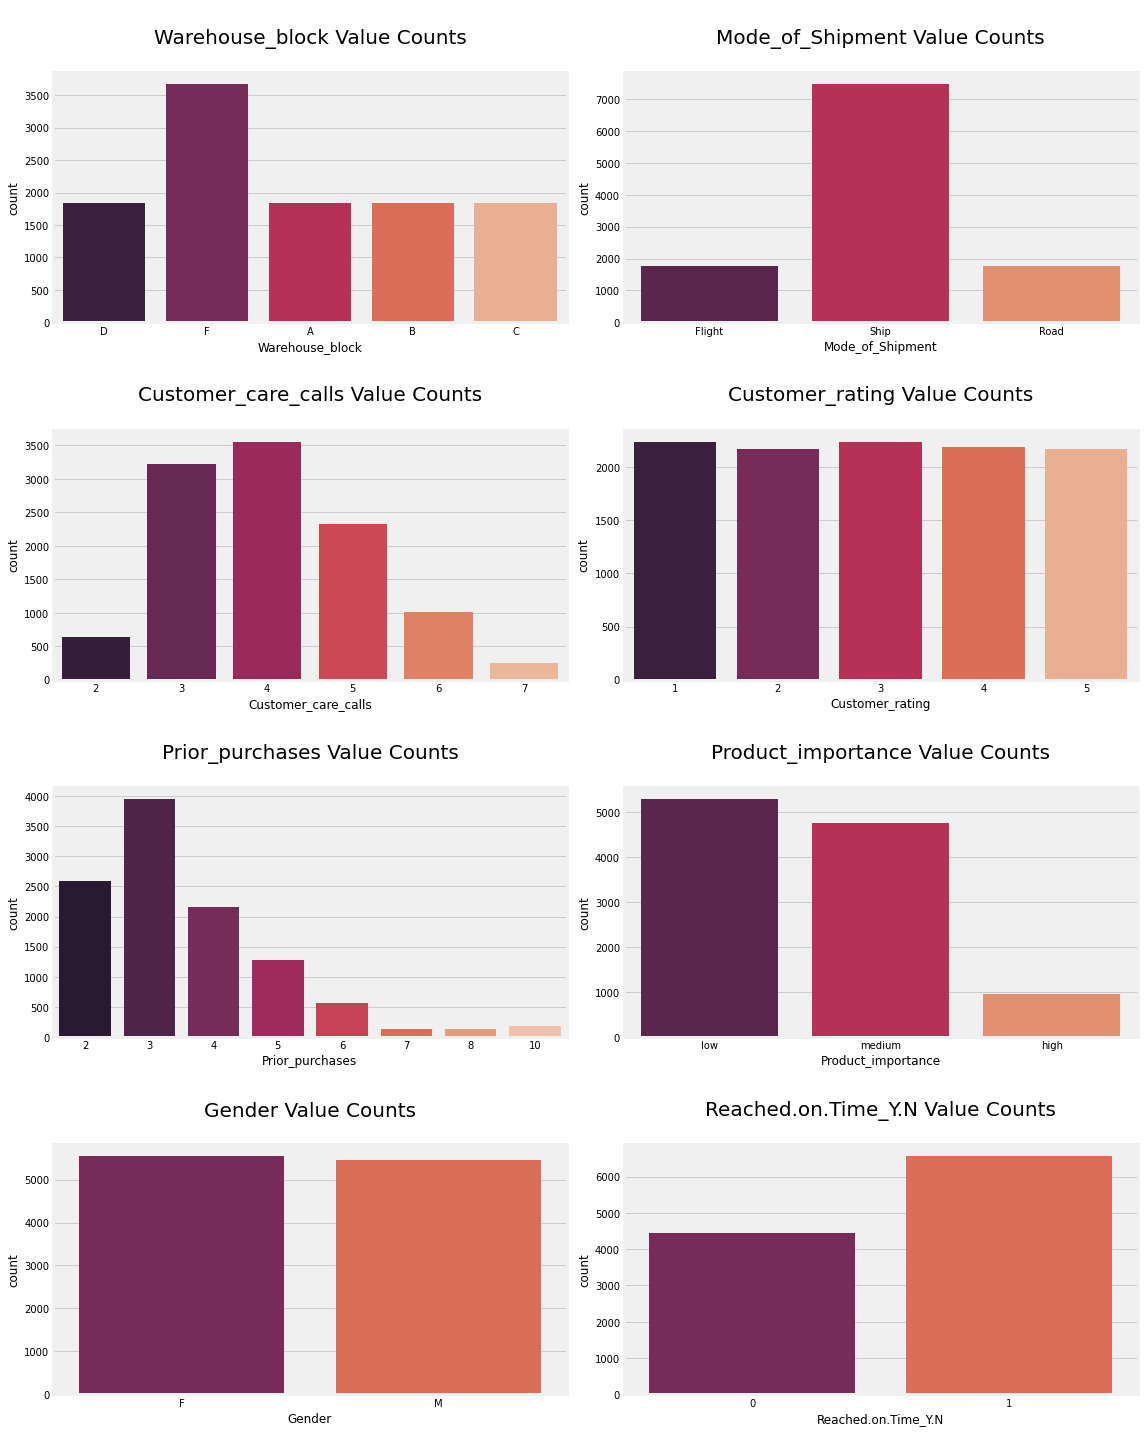

In [10]:
# here by these plots we are lookin at the counts of each categories in the categorical columns
# creating a list of categorical coumns
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

From the above plots, we can conclude following:-
- Warehouse block F have has more values than all other Warehouse blocks.
- In mode of shipment columns we can clearly see that ship delivers the most of products to the customers.
- Most of the customers calls 3 or 4 times to the customer care centers.
- Customer Ratings does not have much variation.
- Most of the customers have 3 prior purchases.
- We can say that mopst of the products are of low Importance.
- Gender Column doesn't have much variance.
- More products doesn't reach on time than products reached on time.


### Exploring relation of categorical columns with reached on time or not

In [11]:
# creating a list of categorical coumns

object_columns = df.select_dtypes(include = ['object'])
object_columns.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


### Ware_house block

In [12]:
# looking at the warehouse column and what are the categories present in it

warehouse = object_columns['Warehouse_block'].value_counts().reset_index()
warehouse.columns = ['warehouse', 'value_counts']
fig = px.pie(warehouse, names = 'warehouse', values = 'value_counts', 
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

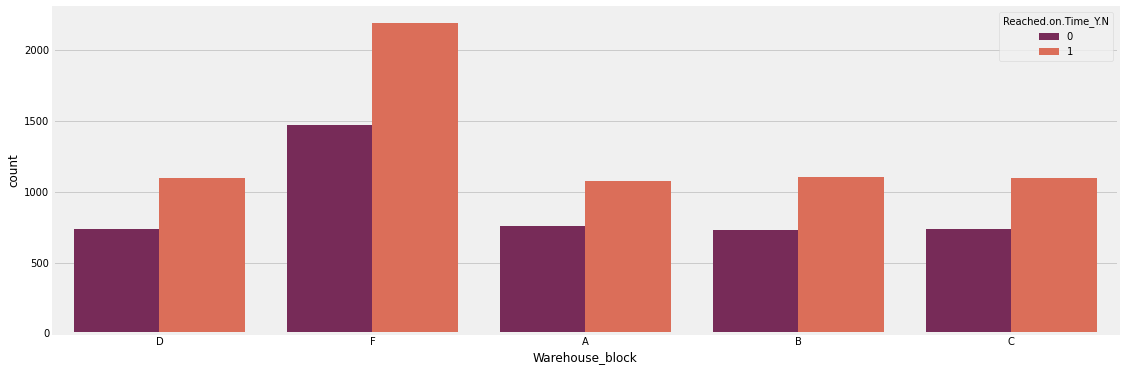

In [13]:
# making a countplot of warehouse column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Warehouse_block', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

### gender

In [14]:
# looking at the gender column and what are the categories present in it

gender = object_columns['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'value_counts']
fig = px.pie(gender, names = 'Gender', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

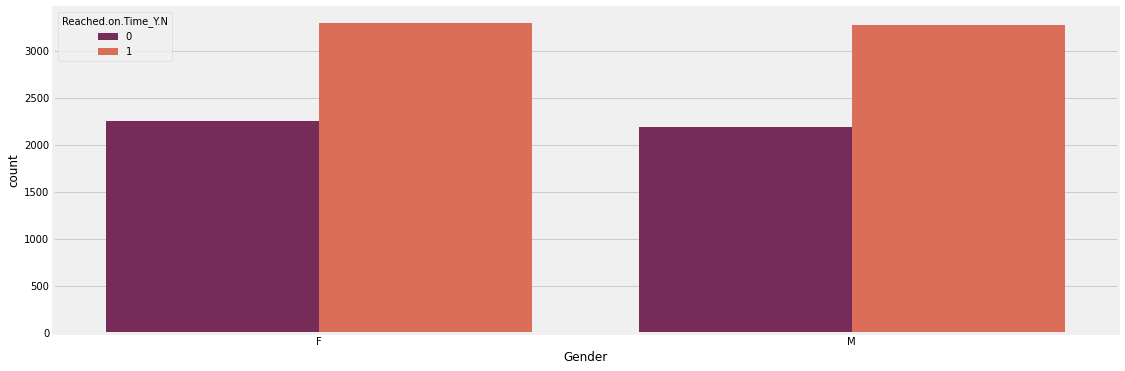

In [15]:
# making a countplot of gender column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Gender', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

### Mode of shipment

In [16]:
# looking at the mode of shipment column and what are the categories present in it

mode = object_columns['Mode_of_Shipment'].value_counts().reset_index()
mode.columns = ['Mode_of_Shipment', 'value_counts']
fig = px.pie(mode, names = 'Mode_of_Shipment', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

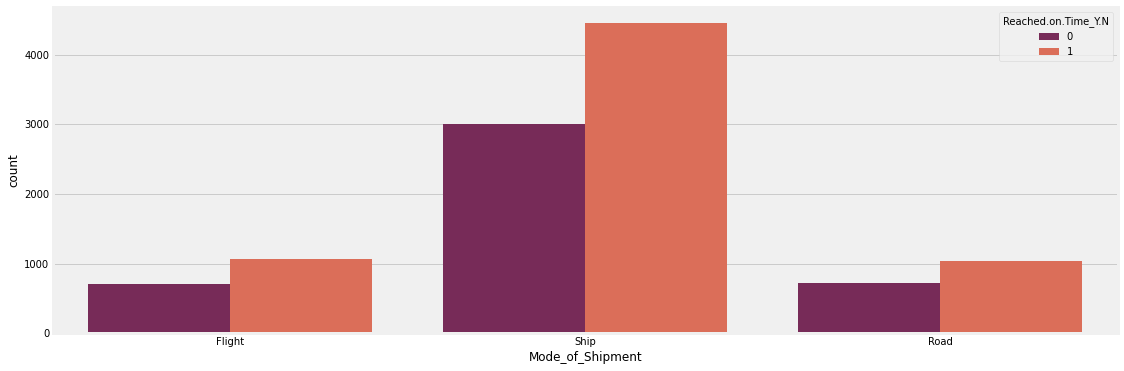

In [17]:
# making a countplot of mode of shipment column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

### Product importance

In [18]:
# looking at the product importance column and what are the categories present in it

product_imp = object_columns['Product_importance'].value_counts().reset_index()
product_imp.columns = ['Product_importance', 'value_counts']
fig = px.pie(product_imp, names = 'Product_importance', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

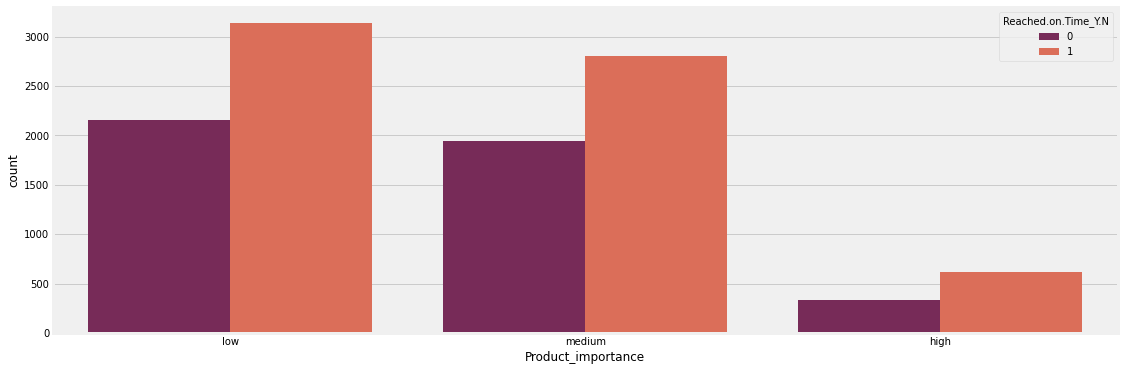

In [19]:
# making a countplot of product importance column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Product_importance', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

### Exploring relation of continuous columns with reached on time or not

In [20]:
# creating a list of continuous columns

integer_columns = df.select_dtypes(include = ['int64'])
integer_columns.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


### Customer_care calls

In [21]:
# looking at the customer care calls column and what are the categories present in it

customer_care = integer_columns['Customer_care_calls'].value_counts().reset_index()
customer_care.columns = ['Customer_care_calls', 'value_counts']
fig = px.pie(customer_care, names = 'Customer_care_calls', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

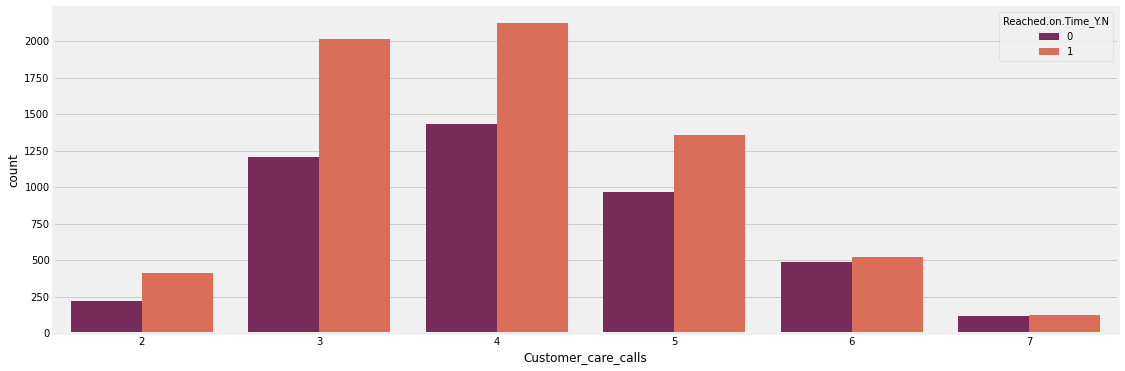

In [22]:
# making a countplot of customer care calls column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

### Customer ratings

In [23]:
# looking at the customer ratings column and what are the categories present in it

customer_ratings = integer_columns['Customer_rating'].value_counts().reset_index()
customer_ratings.columns = ['Customer_rating', 'value_counts']
fig = px.pie(customer_ratings, names = 'Customer_rating', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

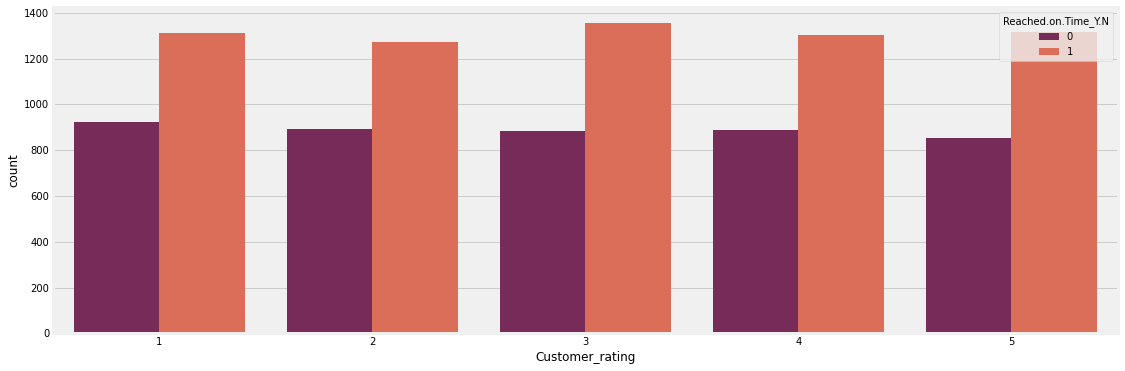

In [24]:
# making a countplot of customer ratings calls column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Customer_rating', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

### Prior_Purchases

In [25]:
# looking at the prior purchases column and what are the categories present in it

prior_purchases = integer_columns['Prior_purchases'].value_counts().reset_index()
prior_purchases.columns = ['Prior_purchases', 'value_counts']
fig = px.pie(prior_purchases, names = 'Prior_purchases', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

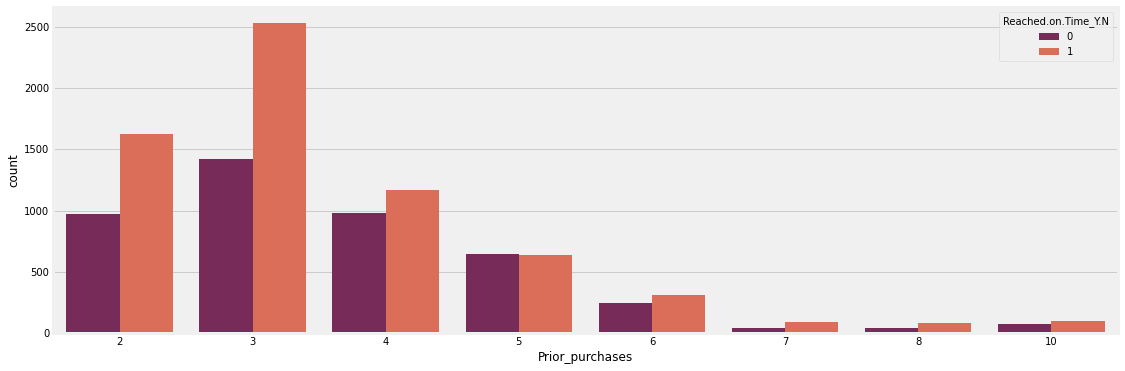

In [26]:
# making a countplot of prior purchases column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Prior_purchases', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

### Reached on Time Delivery

In [27]:
# looking at the reached on time or not column and what are the categories present in it

reached_on_time_y_n = integer_columns['Reached.on.Time_Y.N'].value_counts().reset_index()
reached_on_time_y_n.columns = ['Reached.on.Time_Y.N', 'value_counts']
fig = px.pie(reached_on_time_y_n, names = 'Reached.on.Time_Y.N', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

### Cost of the product

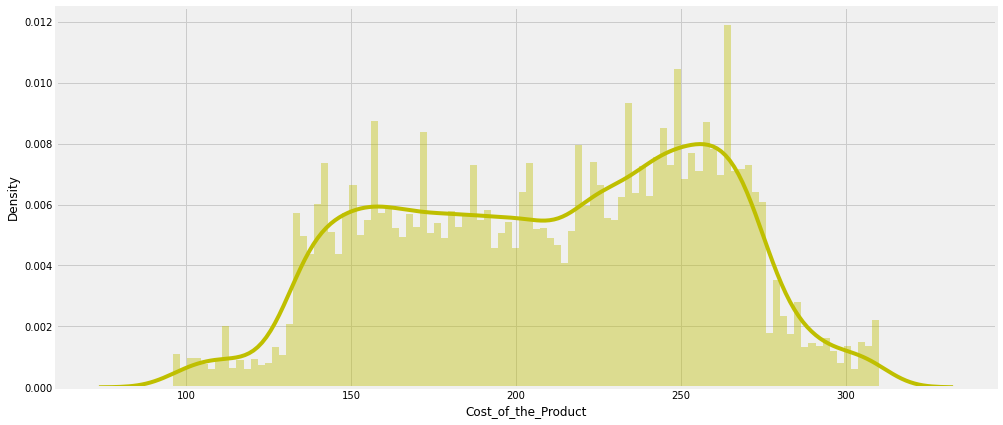

In [28]:
# making a distplot of cost of the product column

plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Cost_of_the_Product'], bins = 100, color = 'y')

plt.show()

In [29]:
# looking at the relation between cost of the product and whether the product reached on time or not using boxplot

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

### Discount Offered

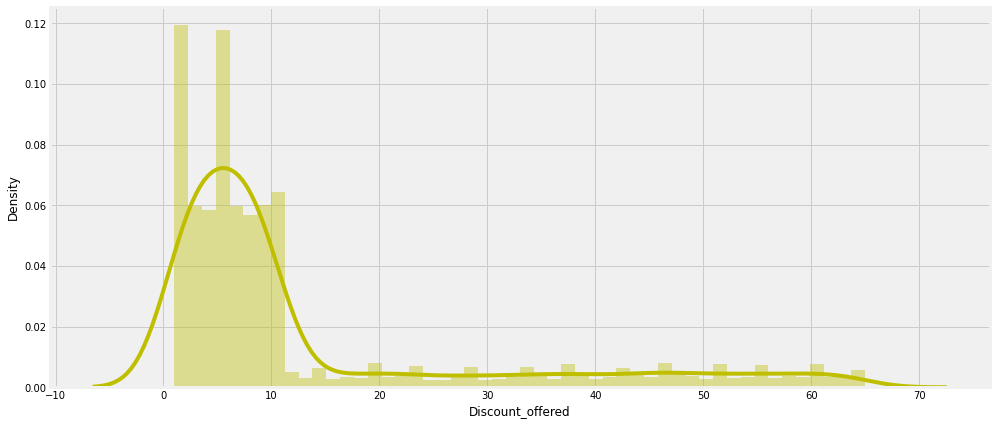

In [30]:
# making a distplot of discount offered column

plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Discount_offered'], color = 'y')

plt.show()

In [31]:
# looking at the relation between discount offered and whether the product reached on time or not using boxplot

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

### Weights in Grams

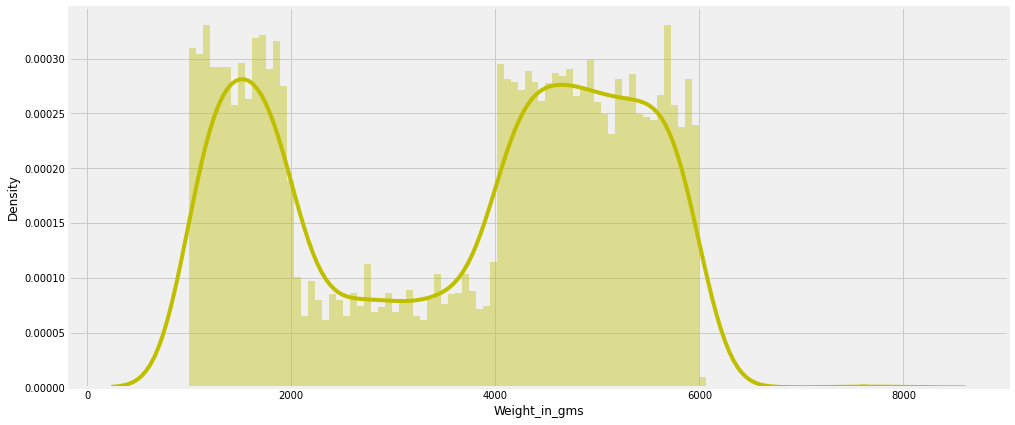

In [32]:
# making a distplot of weights in gram column

plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Weight_in_gms'], bins = 100, color = 'y')

plt.show()

In [33]:
# looking at the relation between weights in grams and whether the product reached on time or not using boxplot\

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

In [34]:
df.head() # looking at first five rows of the data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Which type of warehouse contains most weights ?

In [35]:
# creating a dataframe of warehouse block and weights in gram columns 

ware_block_weight = df.groupby(['Warehouse_block'])['Weight_in_gms'].sum().reset_index()
ware_block_weight

,Warehouse_block,Weight_in_gms
0,A,6627118
1,B,6664240
2,C,6674560
3,D,6655305
4,F,13349327


In [36]:
# checking which type of warehouse contains the most weights 

px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100, color = 'Warehouse_block',
             marginal = 'box', template = 'plotly_dark')

- From above plots we can conclude that warehouse F conatins the most weights.

## Which mode of shipmemnt carries most weights ?

In [37]:
# creating a dataframe of mode of shipment and weights in gram columns 

shipment_mode_weight = df.groupby(['Mode_of_Shipment'])['Weight_in_gms'].sum().reset_index()
shipment_mode_weight

,Mode_of_Shipment,Weight_in_gms
0,Flight,6449405
1,Road,6423209
2,Ship,27097936


In [38]:
# checking which type of shipments carries the most weights 

px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100, color = 'Mode_of_Shipment',
             marginal = 'box', template = 'plotly_dark')

- Ship is the mode of shipment throuh which most of the products were delivered

### Effect of Warehouse on Cost of Product 

In [39]:
# creating a dataframe of warehouse block and cost of the product columns 

warehouse_weight = df.groupby(['Warehouse_block'])['Cost_of_the_Product'].sum().reset_index()
warehouse_weight

,Warehouse_block,Cost_of_the_Product
0,A,382671
1,B,388888
2,C,387114
3,D,386805
4,F,766477


In [40]:
# checking whether or not the warehouse block effects the cost of the product

px.histogram(data_frame = df, x = 'Cost_of_the_Product', nbins = 100, color = 'Warehouse_block',
             marginal = 'box', template = 'plotly_dark')

- Products from warehouse F have the high costs.

### Does Mode of Shipment effect Cost of Product ?

In [41]:
# creating a dataframe of mode of shipment and cost of the product columns 

mode_shipment_cost = df.groupby(['Mode_of_Shipment'])['Cost_of_the_Product'].sum().reset_index()
mode_shipment_cost

,Mode_of_Shipment,Cost_of_the_Product
0,Flight,371938
1,Road,370437
2,Ship,1569580


In [42]:
# checking whether or not the mode of shipment effects the cost of the product

px.histogram(data_frame = df, x = 'Cost_of_the_Product', nbins = 100, color = 'Mode_of_Shipment',
             marginal = 'box', template = 'plotly_dark')

### Does Customer calls effect Ratings ?

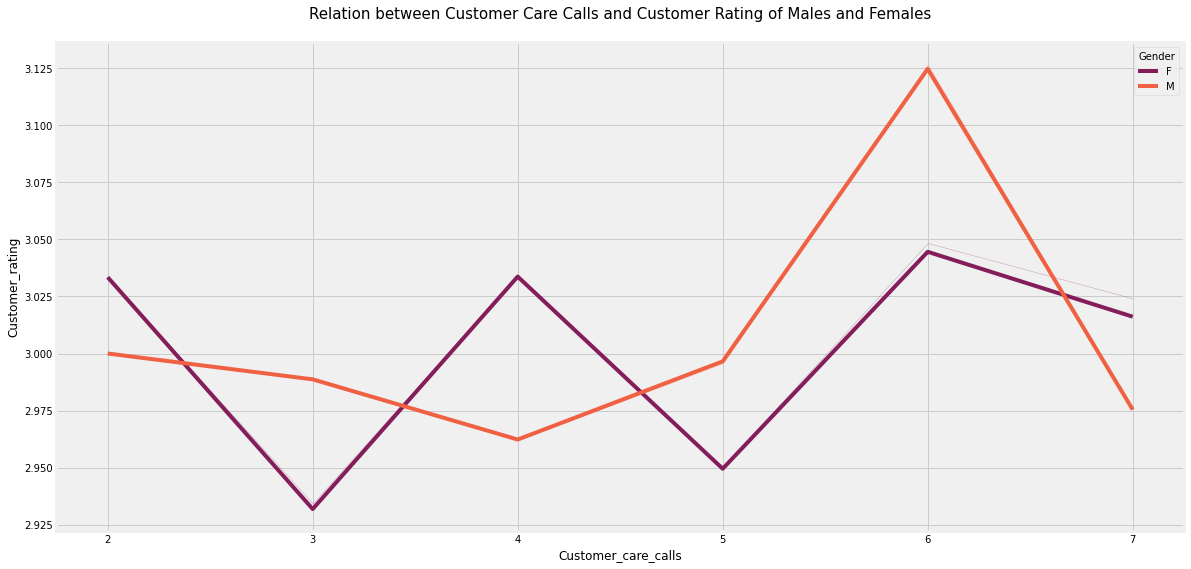

In [43]:
# making a lineplot to check the relation between customer care calls, customer ratings and gender

plt.figure(figsize = (18, 9))
sns.lineplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Gender', data = df,
             palette = 'rocket', ci = 0)
plt.title('Relation between Customer Care Calls and Customer Rating of Males and Females\n',
          fontsize = 15)
plt.show()

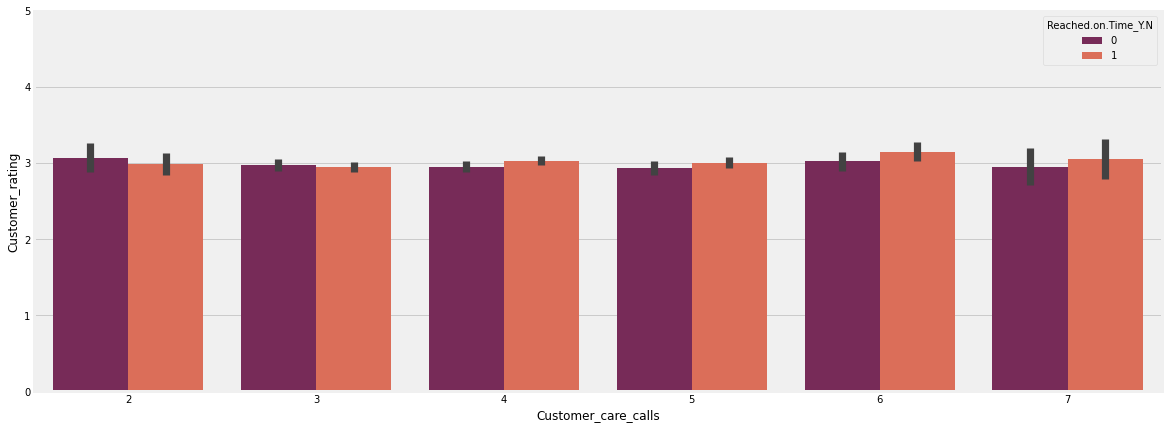

In [44]:
# checking the relation between customer care calls, customer ratings and whether or not the product will reach on time.

plt.figure(figsize = (18, 7))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = df, palette = 'rocket')
plt.ylim(0, 5)
plt.show()

- Customers calls were more when the product doesn't reach on time and when the product reaches at time then the calls were less.

### Relation Between Customer Care Calls, Product importance and Prior Purchases

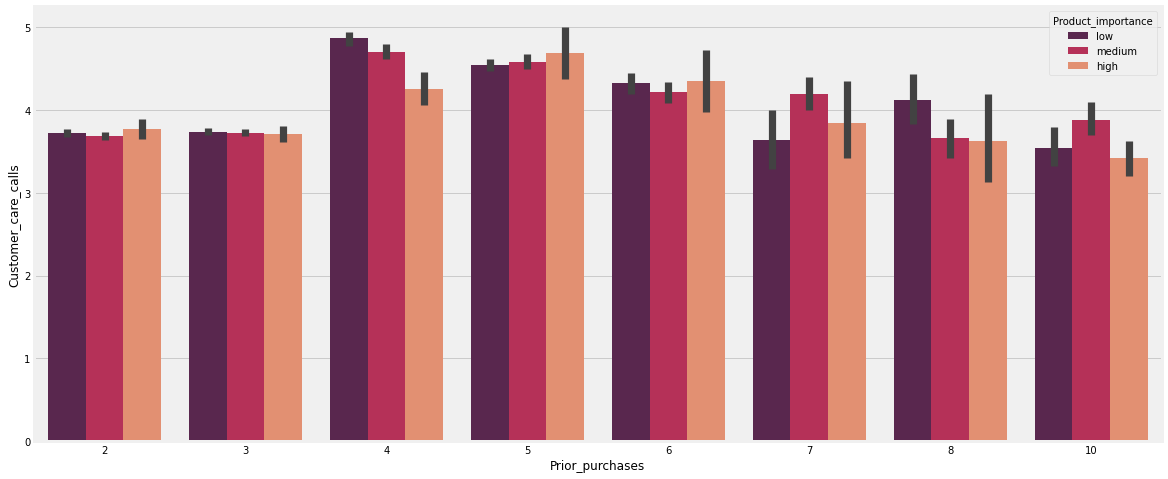

In [45]:
# making a barlot to check the relation between prior purchases, customer care calls and product importance

plt.figure(figsize = (18, 8))
sns.barplot(x = 'Prior_purchases', y = 'Customer_care_calls', data = df, hue = 'Product_importance',
            palette = 'rocket')
plt.show()

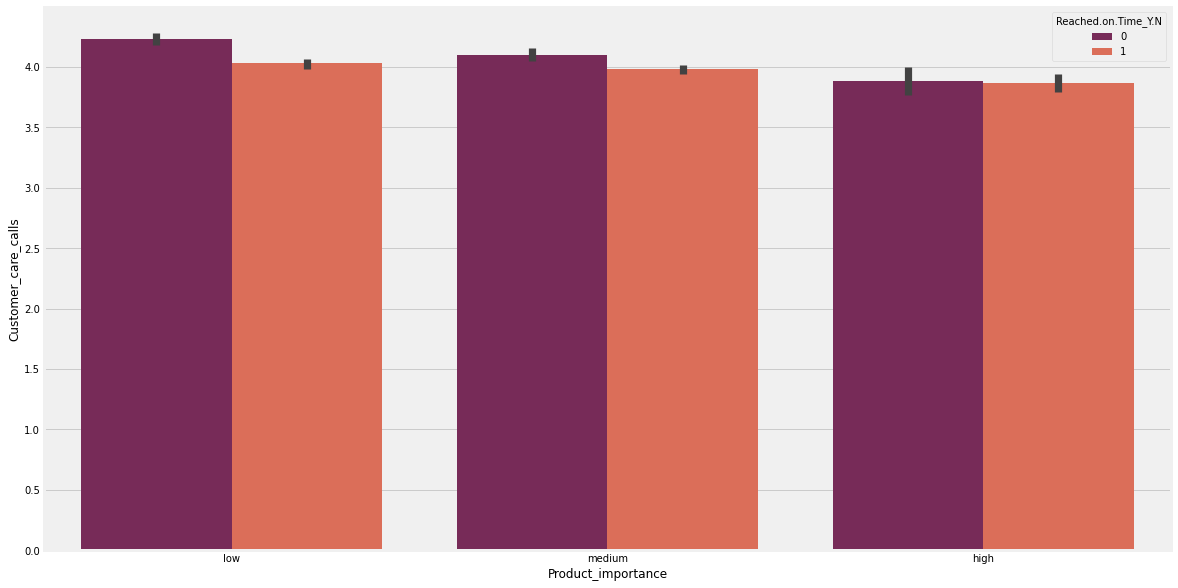

In [46]:
# making a barlot to check the relation between product importance, customer care calls and whether or not the product will
# reach on time or not

plt.figure(figsize = (18, 10))
sns.barplot('Product_importance', y = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df, palette = 'rocket')
plt.show()

- Customer care were more when product importance is less.
- When importance of product is low or medium then more of the products weren't reached on time but when importance of product is high then products reached on time or not reached on time are almost equal.

### Relation Between Product Importance and Discount Offered

In [47]:
# making boxplot between product importance and discount offered to see that is there any relation between them .

px.box(data_frame = df, x = 'Product_importance', y ='Discount_offered', color = 'Product_importance',
       template = 'plotly_dark')

In [48]:
# making boxplot between product importance and discount offered and whether or not the product will reach on time or not
# to see that is there any relation between them .

px.box(data_frame = df, x = 'Product_importance', y ='Cost_of_the_Product', color = 'Reached.on.Time_Y.N',
       template = 'plotly_dark')

- Products of high importance were offered higher discounts.

### Relation Between Gender, Prior_purchases and Reached on time or Not

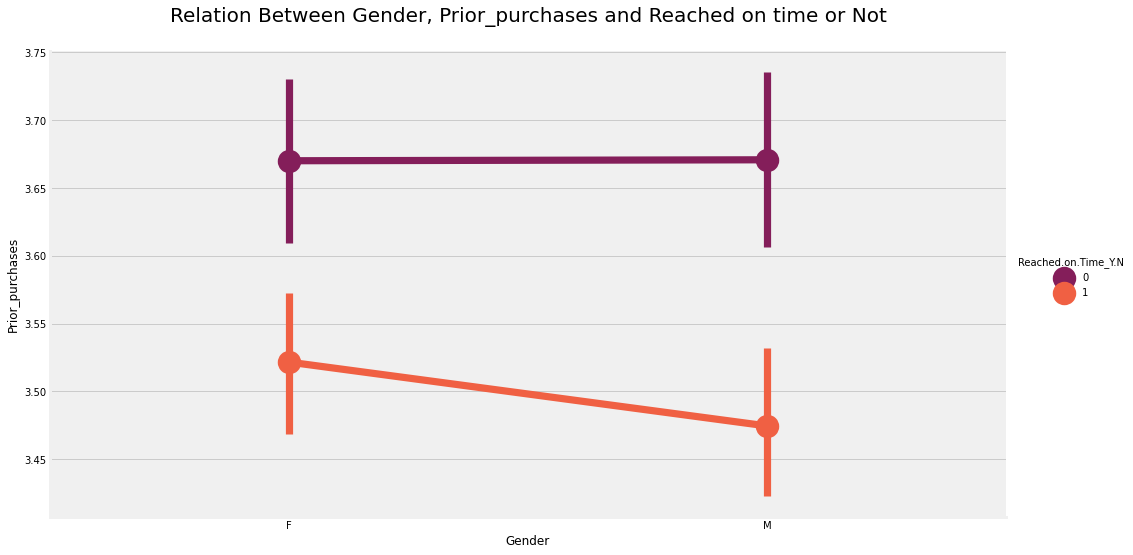

In [49]:
# making a lineplot to check the relation between gender, prior purchases and reached on time or not

sns.catplot(x = 'Gender', y = 'Prior_purchases', hue = 'Reached.on.Time_Y.N', data = df, kind = 'point', height = 7, aspect = 2,
            palette = 'rocket')
plt.title('Relation Between Gender, Prior_purchases and Reached on time or Not\n', fontsize = 20)
plt.show()

### Relation Prior_purchases and Discount Offered and reached on time or not

In [50]:
# making boxplot between prior purchases and discount offered to see that is there any relation between them.

px.box(x = 'Prior_purchases', y = 'Discount_offered', data_frame = df, color = 'Prior_purchases', template = 'plotly_dark')

In [51]:
# making boxplot between prior purchases and discount offered and whether or not the product will reach on time or not
# to see that is there any relation between them.

px.box(x = 'Prior_purchases', y = 'Discount_offered', data_frame = df, color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

- Newly customers and very old ustomers were offered higher discounts.

### Relation between customer care calls and weight of product

In [52]:
# making boxplot between customer care calls and weights in gram to see that is there any relation between them.

px.box(x = 'Customer_care_calls', y = 'Weight_in_gms', data_frame = df, color = 'Customer_care_calls', template = 'plotly_dark')

In [53]:
# making boxplot between customer care calls, weights in gram and whether or not the product will reach on time or not
# to see that is there any relation between them.

px.box(x = 'Customer_care_calls', y = 'Weight_in_gms', data_frame = df, color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

- customer care calls and weights in gram have negative correlation i.e customer care calls are more when weight of product is low and less when weight of product is high.

### Relation between prior purchases and weights in gram

In [54]:
# making boxplot between prior purchases and weights in gram to see that is there any relation between them.

px.box(x = 'Prior_purchases', y = 'Weight_in_gms', data_frame = df, color = 'Prior_purchases', template = 'plotly_dark')

In [55]:
# making boxplot between prior purchases, weights in gram and whether or not the product will reach on time or not
# to see that is there any relation between them.

px.box(x = 'Prior_purchases', y = 'Weight_in_gms', data_frame = df, color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

### Does prior purchases effect cost of the products?

In [56]:
# making boxplot between prior purchases and cost of product to see that is there any relation between them.

px.box(x = 'Prior_purchases', y = 'Cost_of_the_Product', data_frame = df, color = 'Prior_purchases',template = 'plotly_dark')

In [57]:
# making boxplot between prior purchases, cost of product and whether or not the product will reach on time or not
# to see that is there any relation between them.

px.box(x = 'Prior_purchases', y = 'Cost_of_the_Product', data_frame = df, color = 'Reached.on.Time_Y.N',
       template = 'plotly_dark')

### Relation between cost of the products and customer care calls

In [58]:
# making boxplot between customer care calls and cost of product to see that is there any relation between them.

px.box(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data_frame = df, color = 'Customer_care_calls',
       template = 'plotly_dark')

In [59]:
# making boxplot between customer care calls, cost of product and whether or not the product will reach on time or not
# to see that is there any relation between them.

px.box(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data_frame = df, color = 'Reached.on.Time_Y.N',
       template = 'plotly_dark')

- Customer calls were more when the cost of product is high.

### Now lets check the relation between cost of the product and the discount offered and the relation with whether or not the product will reach on time

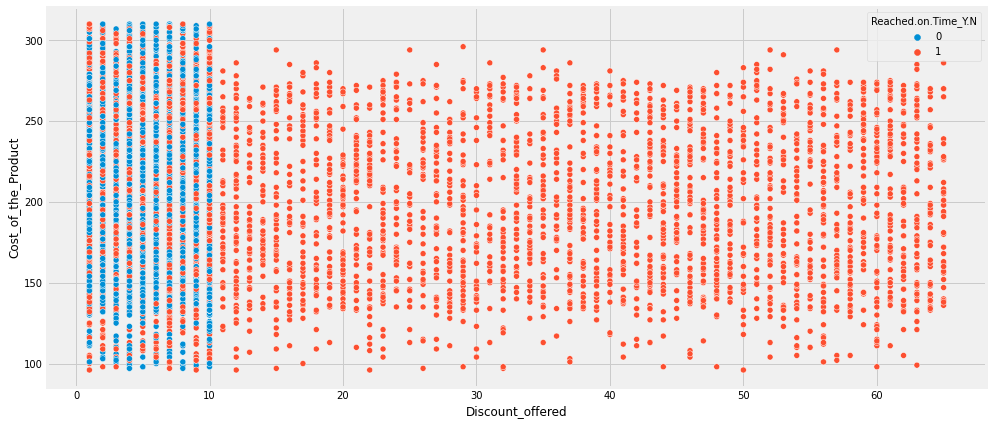

In [60]:
# creating scatter plot to see the relation between cost of the product and the discount offered and the relation with
# whether or not th product will reach on time

plt.figure(figsize = (15, 7))
sns.scatterplot(x='Discount_offered', y='Cost_of_the_Product', data=df, hue='Reached.on.Time_Y.N')

plt.show()

### Categorical Variable Encoding

In [61]:
# encoding categorical variables

df['Warehouse_block'] = df['Warehouse_block'].map({'A' : 0, 'B': 1, 'C': 2, 'D':3, 'F': 4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight' : 0, 'Ship': 1, 'Road': 2})
df['Product_importance'] = df['Product_importance'].map({'low' : 0, 'medium': 1, 'high': 2})
df['Gender'] = df['Gender'].apply(lambda val: 1 if val == 'M' else 0)

In [62]:
df.head() # looking at first five rows after categorical variable encoding

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,0,0,44,1233,1
1,4,0,4,5,216,2,0,1,59,3088,1
2,0,0,2,2,183,4,0,1,48,3374,1
3,1,0,3,3,176,4,1,1,10,1177,1
4,2,0,2,2,184,3,1,0,46,2484,1


In [63]:
# creating features and label

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [64]:
# spiltting our data into training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [65]:
# Scaling the data using standardscaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Now the data is preprocessed, and is ready to used to make predictions using machine learning models**

## Thanks for Reading, Please do upvote if you liked my work !!